In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# df1 = pd.read_csv('/content/drive/MyDrive/Практикум 3 семестр/датасет/датасет_new.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Практикум 3 семестр/датасет/словарь_соцдема.csv')

df1 = pd.read_csv('../../data/часть_датасета_100к.csv')
df2 = pd.read_csv('../../data/словарь_соцдема.csv')

In [7]:
df1.head()

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС
0,2025-09-29T10:20:27+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
1,2025-09-29T10:20:27+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
2,2025-09-29T10:21:56+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
3,2025-09-29T10:21:56+03:00[Europe/Moscow],Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android
4,2025-09-29T10:22:01+03:00[Europe/Moscow],Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android


In [8]:
df2.head()

,number,age_back,gender
0,64,44.0,М
1,65,47.0,М
2,66,53.0,Ж
3,67,39.0,М
4,68,54.0,Ж


In [ ]:
from datetime import datetime

df1['Дата и время события']=df1['Дата и время события'].apply(lambda x: x.split("[")[0])
df1['Дата и время события'] = df1['Дата и время события'].apply(lambda x: datetime.fromisoformat(x))

max, min = df1['Дата и время события'].max(), df1['Дата и время события'].min()
print(f"Данные за период с {min} по {max}")

Данные за период с 2025-09-01 00:15:35+03:00 по 2025-10-25 23:55:48+03:00
Пользователь считается ушедшим после 31 дней


In [ ]:
all_lines = df1.shape[0]
duplicats = df1.duplicated().sum()

all_lines2 = df2.shape[0]
duplicats2 = df2.duplicated().sum()

print(f"Из {all_lines} строк в датафрейме 1, дубликатов {duplicats}")
print(f"Из {all_lines2} строк в датафрейме 2, дубликатов {duplicats2}")

Из 6269242 строк в датафрейме 1, дубликатов 2908592
Из 180341 строк в датафрейме 2, дубликатов 0


In [ ]:
#удалим дубликаты
df1 = df1.drop_duplicates()

all_lines = df1.shape[0]
print(f"{all_lines} строк осталось после удаления дубликатов.")

3360650 строк осталось после удаления дубликатов.


In [ ]:
quantity1 = df1['Идентификатор устройства'].nunique()
quantity2 = df2['number'].nunique()

print(f'Уникальных устройств в первом датасете {quantity1}, уникальных устройств во втором датасете {quantity2}')

Уникальных устройств в первом датасете 179976, уникальных устройств во втором датасете 180341


In [ ]:
mask_missing = ~df1["Идентификатор устройства"].isin(df2["number"])
missing_ids = df1.loc[mask_missing, "Идентификатор устройства"].unique()

num_lost = len(missing_ids)
print(f"Количество устройств, присутствующих в первом датафрейме, но отсутствующих во втором: {num_lost}")

Количество устройств, присутствующих в первом датафрейме, но отсутствующих во втором: 0


In [ ]:
df2 = df2.rename(columns={'number': 'Идентификатор устройства'})
df2.columns.tolist()

['Идентификатор устройства', 'age_back', 'gender']

In [ ]:
cols_to_add = ['Идентификатор устройства', 'age_back', 'gender']

df = df1.merge(
    df2[cols_to_add],
    on='Идентификатор устройства',
    how='left'
)
df.head()

,Дата и время события,Экран,Функционал,Действие,Идентификатор устройства,Номер сессии в рамках устройства,Производитель устройства,Модель устройства,Тип устройства,ОС,age_back,gender
0,2025-09-29 10:20:27+03:00,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
1,2025-09-29 10:21:56+03:00,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
2,2025-09-29 10:22:01+03:00,Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
3,2025-09-29 10:23:49+03:00,Еще,Открытие экрана,NaN,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж
4,2025-09-29 10:20:17+03:00,Новая заявка,Выбор квартиры,Тап на квартиру,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж


In [ ]:
#заменим NaN в столбце Действие на "Неизвестно", NaN в столбце gender на "Неизвестен", NaN в столбце age_back на -1

df['Действие'] = df['Действие'].fillna("Неизвестно")
df['gender'] = df['gender'].fillna("Неизвестен")
df['age_back'] = df['age_back'].fillna(-1)

In [ ]:
df.isna().sum()

,0
Дата и время события,0
Экран,0
Функционал,0
Действие,0
Идентификатор устройства,0
Номер сессии в рамках устройства,0
Производитель устройства,0
Модель устройства,0
Тип устройства,0
ОС,0


In [ ]:
#дата и время первого и последнего действия в приложении для каждого пользователя

user_activity = df.groupby('Идентификатор устройства')['Дата и время события'] \
                  .agg(['min', 'max']) \
                  .rename(columns={'min': 'first_event', 'max': 'last_event'})
user_activity

,first_event,last_event
Идентификатор устройства,,
1,2025-09-01 11:31:05+03:00,2025-10-30 21:50:59+03:00
2,2025-09-19 20:38:56+03:00,2025-10-20 11:47:36+03:00
3,2025-10-09 12:20:36+03:00,2025-10-20 13:34:50+03:00
4,2025-10-04 13:08:08+03:00,2025-10-26 00:28:28+03:00
5,2025-10-20 12:41:02+03:00,2025-10-23 05:52:28+03:00
...,...,...
180337,2025-10-09 11:43:27+03:00,2025-10-09 11:43:27+03:00
180338,2025-10-09 10:55:17+03:00,2025-10-09 10:55:17+03:00
180339,2025-10-09 20:59:04+03:00,2025-10-09 21:00:49+03:00


In [ ]:
#пользователи, которые ушли из приложения (не пользовались 30+ дней)
users_left_app = user_activity[user_activity['last_event']<="2025-09-30 23:59:59+03:00"]
users_left_app = users_left_app.reset_index()

In [ ]:
users_left_app

,Идентификатор устройства,first_event,last_event
0,196,2025-09-01 21:06:55+03:00,2025-09-29 10:25:27+03:00
1,199,2025-09-29 10:40:04+03:00,2025-09-30 00:11:27+03:00
2,200,2025-09-04 19:14:27+03:00,2025-09-29 21:28:50+03:00
3,202,2025-09-20 09:10:45+03:00,2025-09-29 10:50:56+03:00
4,206,2025-09-23 06:30:18+03:00,2025-09-29 11:18:36+03:00
...,...,...,...
59198,180284,2025-09-18 15:59:41+03:00,2025-09-18 15:59:51+03:00
59199,180285,2025-09-13 15:43:09+03:00,2025-09-13 15:43:15+03:00
59200,180286,2025-09-13 17:56:23+03:00,2025-09-13 21:53:34+03:00
59201,180287,2025-09-13 17:50:23+03:00,2025-09-13 17:53:36+03:00


In [ ]:
#добавим столбец 'Ушел из приложения'
df['Ушел из приложения'] = df['Идентификатор устройства'].isin(
    users_left_app['Идентификатор устройства']
).astype(int)

In [ ]:
df_left = df[df['Ушел из приложения'] == 1]
df_use = df[df['Ушел из приложения'] == 0]

bins = [18, 25, 31, 41, 51, 61, 71, 101]
labels = ['18–24', '25–30', '31-40', '41–50', '51–60', '61–70', '71–101']

df_left['age_group'] = pd.cut(df_left['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)
df_use['age_group'] = pd.cut(df_use['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)

/tmp/ipython-input-2864565393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['age_group'] = pd.cut(df_left['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)
/tmp/ipython-input-2864565393.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['age_group'] = pd.cut(df_use['age_back'], bins=bins, labels=labels, right=True, include_lowest=True)


In [ ]:
left_counts = df_left['age_group'].value_counts().sort_index()
stay_counts = df_use['age_group'].value_counts().sort_index()

# Общее количество пользователей в группе
total_counts = left_counts + stay_counts

# Доля ушедших
share_left = left_counts / total_counts
(share_left * 100).round(2)

,count
age_group,
18–24,16.28
25–30,13.24
31-40,12.27
41–50,11.79
51–60,9.99
61–70,9.68
71–101,11.44


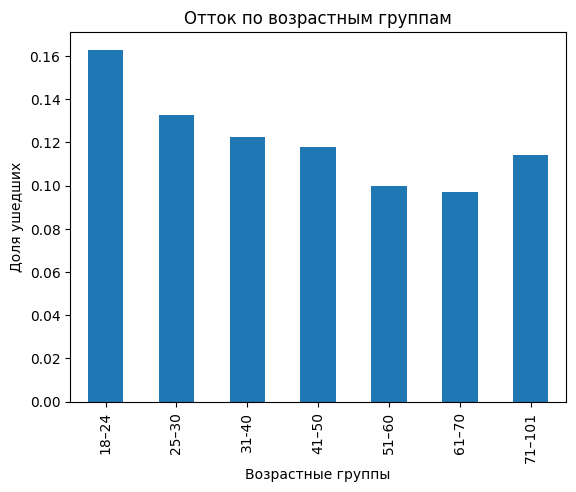

In [ ]:
import matplotlib.pyplot as plt

share_left.plot(kind='bar')
plt.ylabel('Доля ушедших')
plt.xlabel('Возрастные группы')
plt.title('Отток по возрастным группам')
plt.show()

In [ ]:
left_counts = df_left['gender'].value_counts().sort_index()
stay_counts = df_use['gender'].value_counts().sort_index()

total_counts = left_counts + stay_counts
share_left = ((left_counts / total_counts)*100).round(2)
share_left

,count
gender,
Ж,11.61
М,11.64


In [ ]:
left_counts = df_left['ОС'].value_counts().sort_index()
stay_counts = df_use['ОС'].value_counts().sort_index()

total_counts = left_counts + stay_counts
share_left = ((left_counts / total_counts)*100).round(2)
share_left

,count
ОС,
Android,10.50
iOS,13.38


In [ ]:
left_counts = df_left['Тип устройства'].value_counts().sort_index()
stay_counts = df_use['Тип устройства'].value_counts().sort_index()

total_counts = left_counts + stay_counts

share_left = (left_counts / total_counts * 100)
share_left = share_left.fillna(0).round(2)
(share_left.sort_values(ascending=False)).head(5)

,count
Тип устройства,
tablet,14.96
phone,11.69


In [ ]:
#выявляем потенциально проблемные модели устройств

left_counts = df_left['Модель устройства'].value_counts().sort_index()
stay_counts = df_use['Модель устройства'].value_counts().sort_index()

# Общий набор моделей
idx = left_counts.index.union(stay_counts.index)

# Выравниваем индексы и заполняем отсутствующие значения нулями
left_counts = left_counts.reindex(idx, fill_value=0)
stay_counts = stay_counts.reindex(idx, fill_value=0)

total_counts = left_counts + stay_counts

share_left = (left_counts / total_counts * 100).round(2)

# Собираем всё в таблицу
models_stats = pd.DataFrame({
    'Ушли': left_counts,
    'Остались': stay_counts,
    'Всего пользователей данной модели': total_counts,
    'Сколько процентов с такой моделью ушли': share_left
})

models_stats_filtered = models_stats[models_stats['Всего пользователей данной модели'] >= 4000]
models_stats_sorted = models_stats_filtered.sort_values('Сколько процентов с такой моделью ушли', ascending=False)

models_stats_sorted.head(20)

,Ушли,Остались,Всего пользователей данной модели,Сколько процентов с такой моделью ушли
Модель устройства,,,,
Galaxy S21+ 5G,978,4785,5763,16.97
Galaxy S21 FE 5G,1887,10199,12086,15.61
iPhone 15 Pro Max,17092,92694,109786,15.57
Xiaomi 15,824,4507,5331,15.46
iPhone 11 Pro Max,2803,15437,18240,15.37
HONOR 90,1092,6290,7382,14.79
Galaxy A16,721,4169,4890,14.74
iPhone 8 Plus,1316,7629,8945,14.71
RMX3710,622,3623,4245,14.65


In [ ]:
#общие цепочки
chains = df.sort_values(["Идентификатор устройства", 'Номер сессии в рамках устройства', 'Дата и время события'])

In [ ]:
#последние активности во всех сессиях
last_in_session = chains.groupby(['Идентификатор устройства', 'Номер сессии в рамках устройства']).tail(1)

In [ ]:
#цепочки только покинувших приложение

chains_left = df_left.sort_values(["Идентификатор устройства", 'Номер сессии в рамках устройства', 'Дата и время события'])

#последние действия, после кот. пользователи делали приложению ручкой
last_sessions = chains_left.groupby('Идентификатор устройства').tail(1)

In [ ]:
visits = df['Экран'].value_counts() #всего посещений всех экранов
visits_pct = (visits / visits.sum() * 100).round(2) #какая часть всех экранных просмотров приходится на каждый экран


last = last_sessions['Экран'].value_counts() #сколько раз каждый экран стал последним
last_pct = (last / last.sum() * 100).round(2)

comparison = (
    pd.DataFrame({
        'visits': visits,
        'visits_pct': visits_pct,
        'last': last,
        'last_pct': last_pct
    })
    .fillna(0)
    .sort_values('last_pct', ascending=False)
)
#введем индекс "уходоопасности" (показывает, насколько чаще экран становится последним, чем можно ожидать в норме)
comparison['over_index'] = (comparison['last_pct'] / comparison['visits_pct']).round(2)

In [ ]:
#все, что больше единицы - аномалия. выведем все что больше 1.30 - очевидные аномалии
comparison[comparison['over_index']>1.30]

,visits,visits_pct,last,last_pct,over_index
Экран,,,,,
Еще,1733831,51.59,42309.0,71.46,1.39
Важное,234474,6.98,9235.0,15.60,2.23
Новое ОСС,19939,0.59,474.0,0.80,1.36
Связаться с владельцем ТС,7528,0.22,466.0,0.79,3.59


- node_id: hash(screen + feature) идентификатор ноды (функционала).
- event_dt: Дата и время события (datetime)
- screen - Экран
- feature - Функционал
- action - Действие
- device_id - Идентификатор устройства
- session_id - Номер сессии в рамках устройства
- device_vendor - Производитель устройства
- device_model - Модель устройства
- device_type - Тип устройства
- os - ОС
- age - Возраст
- gender - Пол
- is_churn - Из этой ноды вышли и "никогда" не вернулись
- is_bounce - это последняя нода визита

In [ ]:
df.columns.tolist()

['Дата и время события',
 'Экран',
 'Функционал',
 'Действие',
 'Идентификатор устройства',
 'Номер сессии в рамках устройства',
 'Производитель устройства',
 'Модель устройства',
 'Тип устройства',
 'ОС',
 'age_back',
 'gender',
 'Ушел из приложения']

In [ ]:
df_renamed = df.rename(columns={'Дата и время события': 'event_dt', 'Экран': 'screen', 'Функционал': 'feature', 'Действие': 'action',
                                'Идентификатор устройства': 'device_id', 'Номер сессии в рамках устройства': 'session_id',
 'Производитель устройства': 'device_vendor', 'Модель устройства': 'device_model', 'Тип устройства': 'device_type', 'ОС': 'os', 'age_back': 'age', 'Ушел из приложения': 'is_churn'})

In [ ]:
import hashlib

df_renamed['node_id'] = (df_renamed['screen'] + '_' + df_renamed['feature']).apply(lambda x: hashlib.md5(x.encode()).hexdigest())

In [ ]:
df_renamed['is_finish'] = 0
df_renamed.loc[last_in_session.index, 'is_finish'] = 1

In [ ]:
df_renamed

,event_dt,screen,feature,action,device_id,session_id,device_vendor,device_model,device_type,os,age,gender,is_churn,node_id,is_finish
0,2025-09-29 10:20:27+03:00,Еще,Открытие экрана,Неизвестно,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,875e50d28d26088a760866c1125ff124,0
1,2025-09-29 10:21:56+03:00,Еще,Открытие экрана,Неизвестно,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,875e50d28d26088a760866c1125ff124,0
2,2025-09-29 10:22:01+03:00,Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,5281fb229131fa372bd15589fed81bc7,0
3,2025-09-29 10:23:49+03:00,Еще,Открытие экрана,Неизвестно,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,875e50d28d26088a760866c1125ff124,1
4,2025-09-29 10:20:17+03:00,Новая заявка,Выбор квартиры,Тап на квартиру,339,10000000009,Redmi,Redmi Note 12,phone,Android,70.0,Ж,0,e9c334108c17d0d6014b73f196b775f4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360645,2025-10-09 16:18:31+03:00,Новое ОСС,Открытие экрана,Неизвестно,123401,10000000010,Apple,iPhone 7 Plus,phone,iOS,51.0,Ж,0,18b0d595350748c3fd82491de6631219,1
3360646,2025-10-09 18:56:36+03:00,Еще,Открытие экрана,Неизвестно,152365,10000000054,Apple,iPhone XR,phone,iOS,49.0,Ж,0,875e50d28d26088a760866c1125ff124,1
3360647,2025-10-09 14:41:10+03:00,Еще,Открытие экрана,Неизвестно,99472,10000000098,Apple,iPhone 14 Pro Max,phone,iOS,34.0,Ж,0,875e50d28d26088a760866c1125ff124,0
3360648,2025-10-09 14:41:16+03:00,Еще,Переход в раздел 'Заявки',Тап на кнопку 'Заявки',99472,10000000098,Apple,iPhone 14 Pro Max,phone,iOS,34.0,Ж,0,5281fb229131fa372bd15589fed81bc7,0


In [ ]:
df_renamed.to_csv('clean_data.csv')